# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [5]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

Download complete
Extracting data files...
Data extracted


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')

# print(df["Price"].unique())

df['Price'] = df['Price'].str.replace(',','') # Gets rid of the comma by replacing it with nothing (''), and sets df['Price'] to the updated value

# Question 1.1: Because the formatting of the price includes commas when the price is > 1000, it is detected as an object type. The missing values will be for prices over 999 dollars, as there is a comma.

In [7]:
# Question 1.2
df = pd.read_csv('/content/data/mn_police_use_of_force.csv', encoding='latin1')

df['subject_injury']
missing = df['subject_injury'].isna().mean() # Checks mean of the proportion of NA values
print(missing) # 76% of the values are missing

df['subject_injury_clean'] = (
    df['subject_injury']
    .astype(str)
    .str.strip()
    .str.title()
    .replace({'Nan': np.nan})
)

pd.crosstab(
    df['subject_injury_clean'],
    df['force_type'],
    dropna=False
)

df['subject_injury_final'] = df['subject_injury_clean'].fillna("Missing")
pd.crosstab(
    df['subject_injury_final'],
    df['force_type']
)

0.7619342359767892


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_final,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/GSAF5.xls')
#2.1 - used read_excel instead of read_csv

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7073 entries, 0 to 7072
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7073 non-null   object 
 1   Year            7071 non-null   float64
 2   Type            7055 non-null   object 
 3   Country         7023 non-null   object 
 4   State           6586 non-null   object 
 5   Location        6506 non-null   object 
 6   Activity        6490 non-null   object 
 7   Name            6855 non-null   object 
 8   Sex             6495 non-null   object 
 9   Age             4079 non-null   object 
 10  Injury          7038 non-null   object 
 11  Fatal Y/N       6512 non-null   object 
 12  Time            3546 non-null   object 
 13  Species         3942 non-null   object 
 14  Source          7053 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [10]:
df = df.dropna(axis=0, how='all') #drop row if all values are missing
#2.2 dropped columns if missing values

2.3 An observation is a single shark attack incident, where each row represents one recorded shark encounter

In [34]:
import pandas as pd
df = pd.read_excel('/content/GSAF5.xls')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [35]:
#2.4 Printing Ranges
print("Min year:", df['Year'].min())
print("Max year:", df['Year'].max())
df_recent = df[df['Year'] >= 1940]
print("Attacks since 1940:", len(df_recent))


Min year: 0.0
Max year: 2026.0
Attacks since 1940: 5537


<Axes: xlabel='Year'>

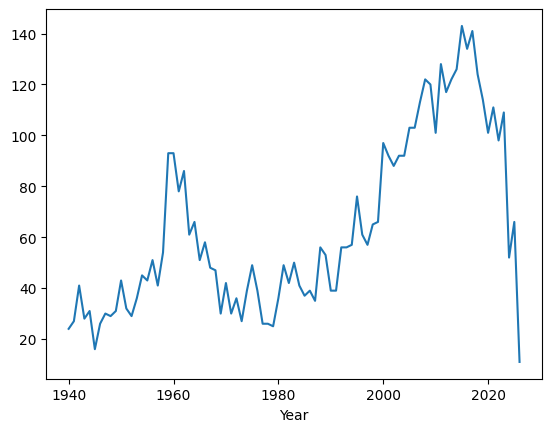

In [36]:
attacks_per_year = df_recent['Year'].value_counts().sort_index()
attacks_per_year.plot()

#Attacks have generally increased over time, especially from 1980-2020. However at 2020, there is a noticeably significant drop.
#Perhaps this downward trend after 2020 has something to do with the global coronavirus pandemic


In [37]:
df_recent['Age'] = pd.to_numeric(df_recent['Age'], errors='coerce')


/tmp/ipython-input-3275722888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Age'] = pd.to_numeric(df_recent['Age'], errors='coerce')


In [38]:
df_recent['Age'].isna().mean()



np.float64(0.346035759436518)

<Axes: >

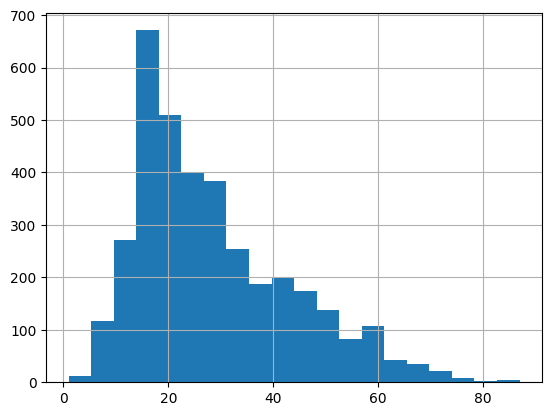

In [39]:
df_recent['Age'].hist(bins=20)
#2.5 Most victims seem to be in their 20s to 30s, which makes sense as these are generally the most active adult years in a human life


In [41]:
df_recent['Type'] = df_recent['Type'].astype(str).str.strip().str.title()

def clean_type(type_val):
    if 'Provoked' in type_val:
        return 'Provoked'
    elif 'Unprovoked' in type_val:
        return 'Unprovoked'
    else:
        return 'Unknown'

df_recent['Type'] = df_recent['Type'].apply(clean_type)

print(df_recent['Type'].value_counts())

Type
Unprovoked    4125
Unknown        889
Provoked       523
Name: count, dtype: int64


/tmp/ipython-input-2460292647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Type'] = df_recent['Type'].astype(str).str.strip().str.title()
/tmp/ipython-input-2460292647.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Type'] = df_recent['Type'].apply(clean_type)


In [42]:
unprovoked_count = df_recent['Type'].value_counts().get('Unprovoked', 0)
total_attacks = df_recent['Type'].value_counts().sum()

if total_attacks > 0:
    proportion_unprovoked = unprovoked_count / total_attacks
    print(f"Proportion of unprovoked attacks: {proportion_unprovoked:.2f}")
else:
    print("No attacks recorded to calculate the proportion.")

Proportion of unprovoked attacks: 0.74


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

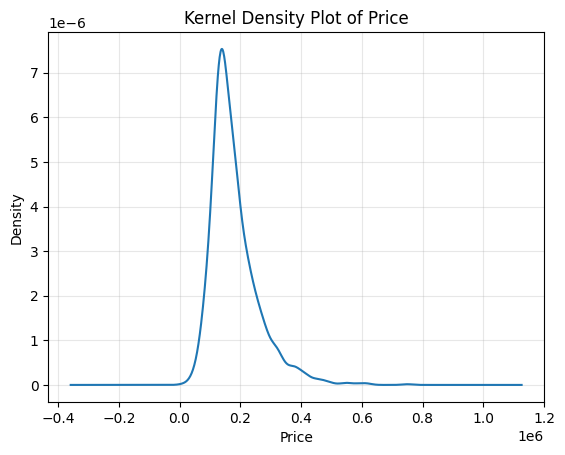

Summary Statistics for Price:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64




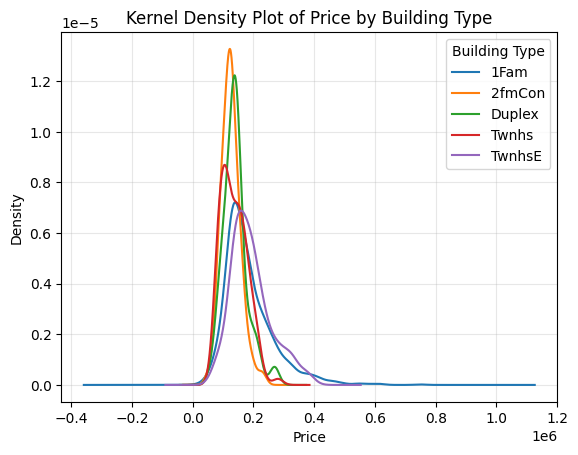


Bldg.Type
TwnhsE    192311.914163
1Fam      184812.041237
Duplex    139808.935780
Twnhs     135934.059406
2fmCon    125581.709677
Name: price, dtype: float64

Bldg.Type
1Fam      6.859451e+09
TwnhsE    4.381346e+09
Twnhs     1.758874e+09
Duplex    1.560169e+09
2fmCon    9.665408e+08
Name: price, dtype: float64



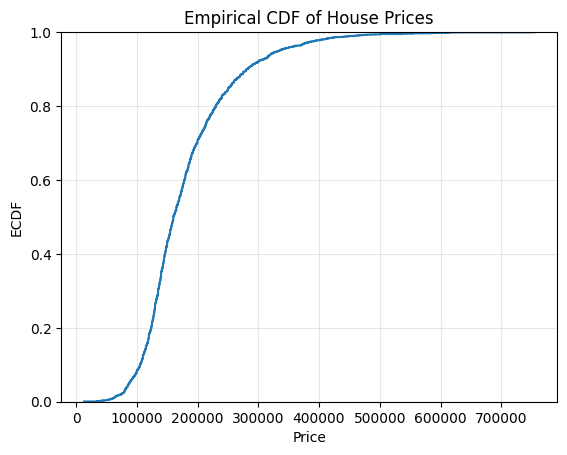

5-Number Summary for Price:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64



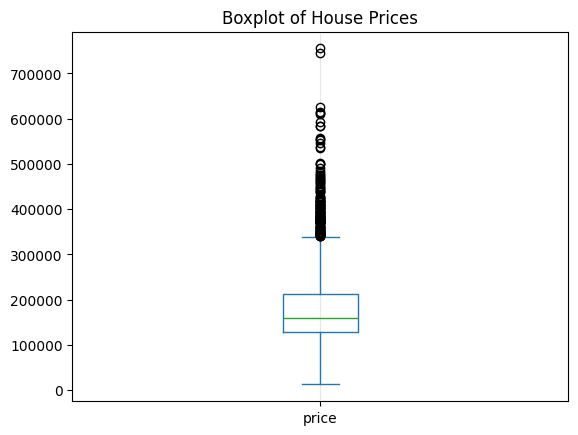

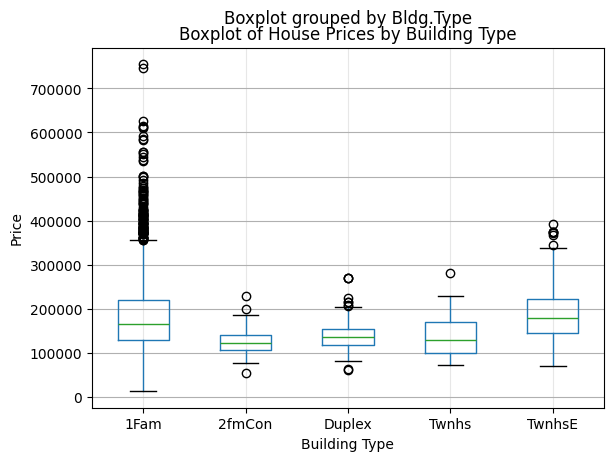

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the ames_prices.csv data with Pandas.
df = pd.read_csv('/content/data/ames_prices.csv', encoding = 'latin1')

# 2. Make a kernel density plot of price and compute a describe table.
# Now, make a kernel density plot of price conditional on building type, and
# use .groupby() to make a describe type for each type of building.

df['price'].plot.kde()
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price')
plt.grid(True, alpha=0.3)
plt.show()

print("Summary Statistics for Price:")
print(df['price'].describe())
print("\n")

df.groupby('Bldg.Type')['price'].plot.kde()
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price by Building Type')
plt.legend(title='Building Type')
plt.grid(True, alpha=0.3)
plt.show()
print()

# 2a. Which building types are the most expensive, on average?
print(df.groupby('Bldg.Type')['price'].mean().sort_values(ascending=False))
# TwnhsE buildings are the most expensive on average.
print()

# 2b. Which have the highest variance in transaction prices?
print(df.groupby('Bldg.Type')['price'].var().sort_values(ascending=False))
# 1Fam buildings have the highest variance in transaction prices
print()

# 3. Make an ECDF plot of price, and compute the sample minimum,
# .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary)
sns.ecdfplot(df['price'])
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.title('Empirical CDF of House Prices')
plt.grid(True, alpha=0.3)
plt.show()

print("5-Number Summary for Price:")
print(df['price'].describe())
print()

# 4. Make a boxplot of price. Are there outliers?
# Make a boxplot of price conditional on building type. What patterns do you see?

df['price'].plot.box()
plt.title('Boxplot of House Prices')
plt.grid(True, axis='x', alpha=0.3)
plt.show()
print()

df.boxplot(column='price', by='Bldg.Type')
plt.xlabel('Building Type')
plt.ylabel('Price')
plt.title('Boxplot of House Prices by Building Type')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

# 5. Make a dummy variable indicating that an observation is an outlier.

# 6. Winsorize the price variable, and compute a new kernel density plot and
# describe table. How do the results change?

# Task
Load the dataset from `/content/data/sharks.csv` using `encoding='latin1'`, display the first few rows and column names, and drop any columns that contain only missing values. Provide a written explanation defining what an 'observation' is in this dataset and how this impacts your cleaning strategy. Clean the `Year` column to handle invalid entries, describe the range of years, and analyze the trend of attacks since 1940 by plotting the number of attacks per year. Clean the `Age` variable and generate a histogram to visualize the age distribution of victims. Standardize the `Type` variable to contain only 'Provoked', 'Unprovoked', and 'Unknown', and calculate the proportion of unprovoked attacks. Similarly, clean the `Fatal (Y/N)` variable to categories 'Y', 'N', and 'Unknown'. Finally, investigate whether attacks are more likely to be fatal when provoked versus unprovoked and provide a summary of your findings.

## Load Data

### Subtask:
Load the shark attack dataset and inspect the columns.


**Reasoning**:
Load the shark attack dataset from the specified CSV file using the 'latin1' encoding, then display the first 5 rows and print the column names to inspect the data.



In [10]:
df = pd.read_csv('/content/data/sharks.csv', encoding='latin1')

# Display the first 5 rows
print(df.head())

# Print the column names
print(df.columns)

   index   Case Number                  Date    Year        Type      Country  \
0      0    2020.02.05           05-Feb-2020  2020.0  Unprovoked          USA   
1      1  2020.01.30.R  Reported 30-Jan-2020  2020.0    Provoked      BAHAMAS   
2      2    2020.01.17           17-Jan-2020  2020.0  Unprovoked    AUSTRALIA   
3      3    2020.01.16           16-Jan-2020  2020.0  Unprovoked  NEW ZEALAND   
4      4    2020.01.13           13-Jan-2020  2020.0  Unprovoked          USA   

              Area               Location                  Activity  \
0             Maui                    NaN  Stand-Up Paddle boarding   
1           Exumas                    NaN                  Floating   
2  New South Wales          Windang Beach                   Surfing   
3        Southland            Oreti Beach                   Surfing   
4   North Carolina  Rodanthe, Dare County                   Surfing   

              Name  ... Unnamed: 246 Unnamed: 247 Unnamed: 248 Unnamed: 249  \
0      

/tmp/ipython-input-3647382158.py:1: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data/sharks.csv', encoding='latin1')


**Reasoning**:
The previous execution triggered a `DtypeWarning` because some columns have mixed types. Adding `low_memory=False` allows pandas to process the file more effectively to infer types, suppressing the warning.



In [11]:
df = pd.read_csv('/content/data/sharks.csv', encoding='latin1', low_memory=False)

# Display the first 5 rows
print(df.head())

# Print the column names
print(df.columns)

   index   Case Number                  Date    Year        Type      Country  \
0      0    2020.02.05           05-Feb-2020  2020.0  Unprovoked          USA   
1      1  2020.01.30.R  Reported 30-Jan-2020  2020.0    Provoked      BAHAMAS   
2      2    2020.01.17           17-Jan-2020  2020.0  Unprovoked    AUSTRALIA   
3      3    2020.01.16           16-Jan-2020  2020.0  Unprovoked  NEW ZEALAND   
4      4    2020.01.13           13-Jan-2020  2020.0  Unprovoked          USA   

              Area               Location                  Activity  \
0             Maui                    NaN  Stand-Up Paddle boarding   
1           Exumas                    NaN                  Floating   
2  New South Wales          Windang Beach                   Surfing   
3        Southland            Oreti Beach                   Surfing   
4   North Carolina  Rodanthe, Dare County                   Surfing   

              Name  ... Unnamed: 246 Unnamed: 247 Unnamed: 248 Unnamed: 249  \
0      

## Drop Empty Columns

### Subtask:
Drop columns that contain only missing values.


**Reasoning**:
Drop columns that have all NaN values to clean the dataset, as requested in the subtask.



In [12]:
# Drop columns where all values are missing
df.dropna(axis=1, how='all', inplace=True)

# Print the new shape of the DataFrame
print(f"New shape: {df.shape}")

# Print the remaining column names
print(df.columns)

New shape: (6462, 24)
Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Unnamed: 9', 'Age', 'Injury',
       'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf',
       'href formula', 'href', 'Case Number.1', 'Case Number.2',
       'original order', 'Unnamed: 23'],
      dtype='object')


## Explain Observation

### Subtask:
Define an observation and explain the cleaning strategy based on data inspection.


**Reasoning**:
Inspect the dataframe for duplicate rows and investigate the 'Case Number' column and the end of the dataframe to identify non-observation rows. This analysis is necessary to define what constitutes a valid observation and to formulate a cleaning strategy.



In [13]:
# 1. Calculate and print the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# 2. Calculate the number of unique values in 'Case Number' vs total rows
unique_cases = df['Case Number'].nunique()
total_rows = len(df)
print(f"Unique Case Numbers: {unique_cases} out of {total_rows} rows")

# 3. Display the last 10 rows to inspect for summary rows or junk data
print("\nLast 10 rows of the dataframe:")
print(df.tail(10))

Number of duplicate rows: 0
Unique Case Numbers: 6442 out of 6462 rows

Last 10 rows of the dataframe:
      index Case Number         Date  Year        Type             Country  \
6452   6452     ND.0010   Circa 1862   0.0  Unprovoked                 USA   
6453   6453     ND.0009  Before 1906   0.0  Unprovoked           AUSTRALIA   
6454   6454     ND.0008  Before 1906   0.0  Unprovoked           AUSTRALIA   
6455   6455     ND.0007  Before 1906   0.0  Unprovoked           AUSTRALIA   
6456   6456     ND.0006  Before 1906   0.0  Unprovoked           AUSTRALIA   
6457   6457     ND.0005  Before 1903   0.0  Unprovoked           AUSTRALIA   
6458   6458     ND.0004  Before 1903   0.0  Unprovoked           AUSTRALIA   
6459   6459     ND.0003    1900-1905   0.0  Unprovoked                 USA   
6460   6460     ND.0002    1883-1889   0.0  Unprovoked              PANAMA   
6461   6461     ND.0001    1845-1853   0.0  Unprovoked  CEYLON (SRI LANKA)   

                   Area               

# Task
Correct the `dropna` function call to `df.dropna(axis=1, how='all', inplace=True)` to properly drop columns with all missing values directly on the DataFrame.

## Fix Dropna Call

### Subtask:
Correct the `dropna` function call to `df.dropna(axis=1, how='all', inplace=True)` to properly drop columns with all missing values directly on the DataFrame.


## Summary:

### Data Analysis Key Findings
*   The `dropna` function call was corrected to `df.dropna(axis=1, how='all', inplace=True)`, ensuring that columns containing only missing values are dropped directly from the DataFrame.

### Insights or Next Steps
*   It is crucial to use specific parameters like `axis=1` (for columns), `how='all'` (to drop only if all values are missing), and `inplace=True` (to modify the DataFrame directly) when performing data cleaning operations to achieve the desired outcome efficiently.
